In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tuner-results/model_metrics.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import linprog


In [3]:
# results = pd.read_csv("/kaggle/input/tuner-results/model_performance.csv")
# fair_results = pd.read_csv("/kaggle/input/tuner-results/fairness_metrics.csv")
model_metrics = pd.read_csv("/kaggle/input/tuner-results/model_metrics.csv")
model_metrics

model configuration  accuracy  total_params  trainable_params  \
0    MLP        64-256    0.8900         65839             21775   
1    MLP        32-256    0.8389         40111             13199   
2    MLP        64-128    0.8964         34095             11279   
3    MLP        256-64    0.9007         61999             20623   
4    MLP        256-32    0.8844         35631             11855   
..   ...           ...       ...           ...               ...   
64   CNN        128-32    0.8199         66607             22095   
65   CNN         32-32    0.8488         18031              5967   
66   CNN         32-64    0.8440         35183             11663   
67   CNN         64-64    0.8795         66735             22159   
68   CNN         64-32    0.8532         34223             11343   

    non_trainable_params  optimizer_params  total_params_excluding_optimizer  
0                    512             43552                             22287  
1                    512             26400                             13711  
2                    256             22560                             11535  
3                    128             41248                             20751  
4                     64             23712                             11919  
..                   ...               ...                               ...  
64                   320             44192                             22415  
65                   128             11936                              6095  
66                   192             23328                             11855  
67                   256             44320                             22415  
68                   192             22688                             11535  

[69 rows x 8 columns]

In [23]:
# Create separate DataFrames for each model type
mlp_df = model_metrics[model_metrics["model"] == "MLP"][["accuracy", "configuration", "trainable_params", "non_trainable_params","optimizer_params", "total_params", "total_params_excluding_optimizer"]]
gru_df = model_metrics[model_metrics["model"] == "GRU"][["accuracy", "configuration", "trainable_params", "non_trainable_params","optimizer_params", "total_params", "total_params_excluding_optimizer"]]
lstm_df = model_metrics[model_metrics["model"] == "LSTM"][["accuracy", "configuration", "trainable_params", "non_trainable_params","optimizer_params", "total_params", "total_params_excluding_optimizer"]]
rnn_df = model_metrics[model_metrics["model"] == "RNN"][["accuracy", "configuration", "trainable_params", "non_trainable_params","optimizer_params", "total_params", "total_params_excluding_optimizer"]]
cnn_df = model_metrics[model_metrics["model"] == "CNN"][["accuracy", "configuration", "trainable_params", "non_trainable_params","optimizer_params", "total_params", "total_params_excluding_optimizer"]]

# Displaying one of the DataFrames as an example
cnn_df

accuracy configuration  trainable_params  non_trainable_params  \
57    0.9062        32-256             45839                   576   
58    0.9023        64-128             43791                   384   
59    0.8828        256-64             43151                   384   
60    0.8063        256-32             22095                   320   
61    0.9084       128-256             87055                   640   
62    0.8941        32-128             23055                   320   
63    0.8811       256-128             85263                   512   
64    0.8199        128-32             22095                   320   
65    0.8488         32-32              5967                   128   
66    0.8440         32-64             11663                   192   
67    0.8795         64-64             22159                   256   
68    0.8532         64-32             11343                   192   

    optimizer_params  total_params  total_params_excluding_optimizer  
57             91680        138095                             46415  
58             87584        131759                             44175  
59             86304        129839                             43535  
60             44192         66607                             22415  
61            174112        261807                             87695  
62             46112         69487                             23375  
63            170528        256303                             85775  
64             44192         66607                             22415  
65             11936         18031                              6095  
66             23328         35183                             11855  
67             44320         66735                             22415  
68             22688         34223                             11535

In [35]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.



Analysis for MLP Model
Optimal configuration: 128-128 (ID: 14)
Accuracy: 0.9066
Parameters: 20495

Linear Programming Formulation:
Decision Variables:
  x₁ = size of first layer (x₁ ∈ {32, 64, 128, 256})
  x₂ = size of second layer (x₂ ∈ {32, 64, 128, 256})
Objective Function:
  Maximize f(x₁, x₂) = Accuracy(x₁, x₂)
Constraints:
  1. Accuracy > 0.9
  2. 15000 ≤ Params(x₁, x₂) ≤ 25000
    

Analysis for GRU Model
Optimal configuration: 128-32 (ID: 8)
Accuracy: 0.9580
Parameters: 55055

Linear Programming Formulation:
Decision Variables:
  x₁ = size of first layer (x₁ ∈ {32, 64, 128, 256})
  x₂ = size of second layer (x₂ ∈ {32, 64, 128, 256})
Objective Function:
  Maximize f(x₁, x₂) = Accuracy(x₁, x₂)
Constraints:
  1. Accuracy > 0.95
  2. 20000 ≤ Params(x₁, x₂) ≤ 70000
    

Analysis for LSTM Model
Optimal configuration: 128-128 (ID: 14)
Accuracy: 0.9601
Parameters: 85519

Linear Programming Formulation:
Decision Variables:
  x₁ = size of first layer (x₁ ∈ {32, 64, 128, 256})
  x₂ = si

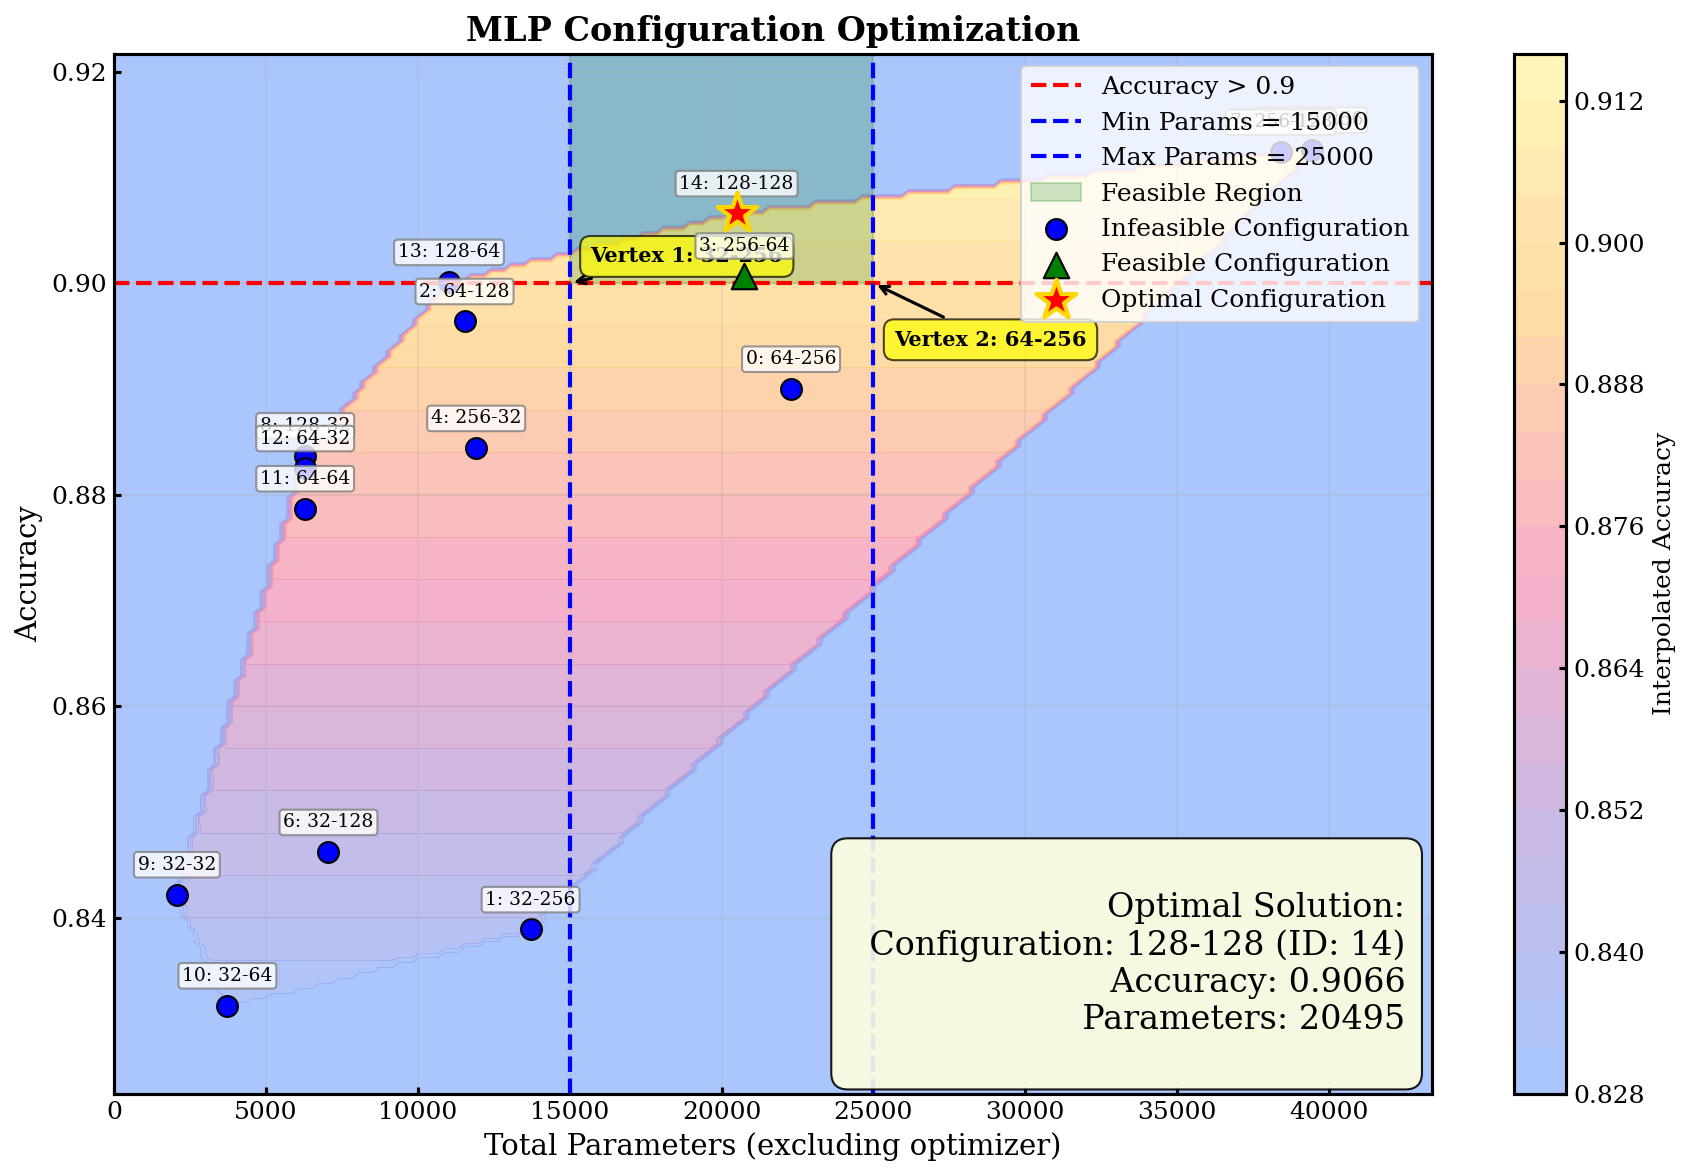

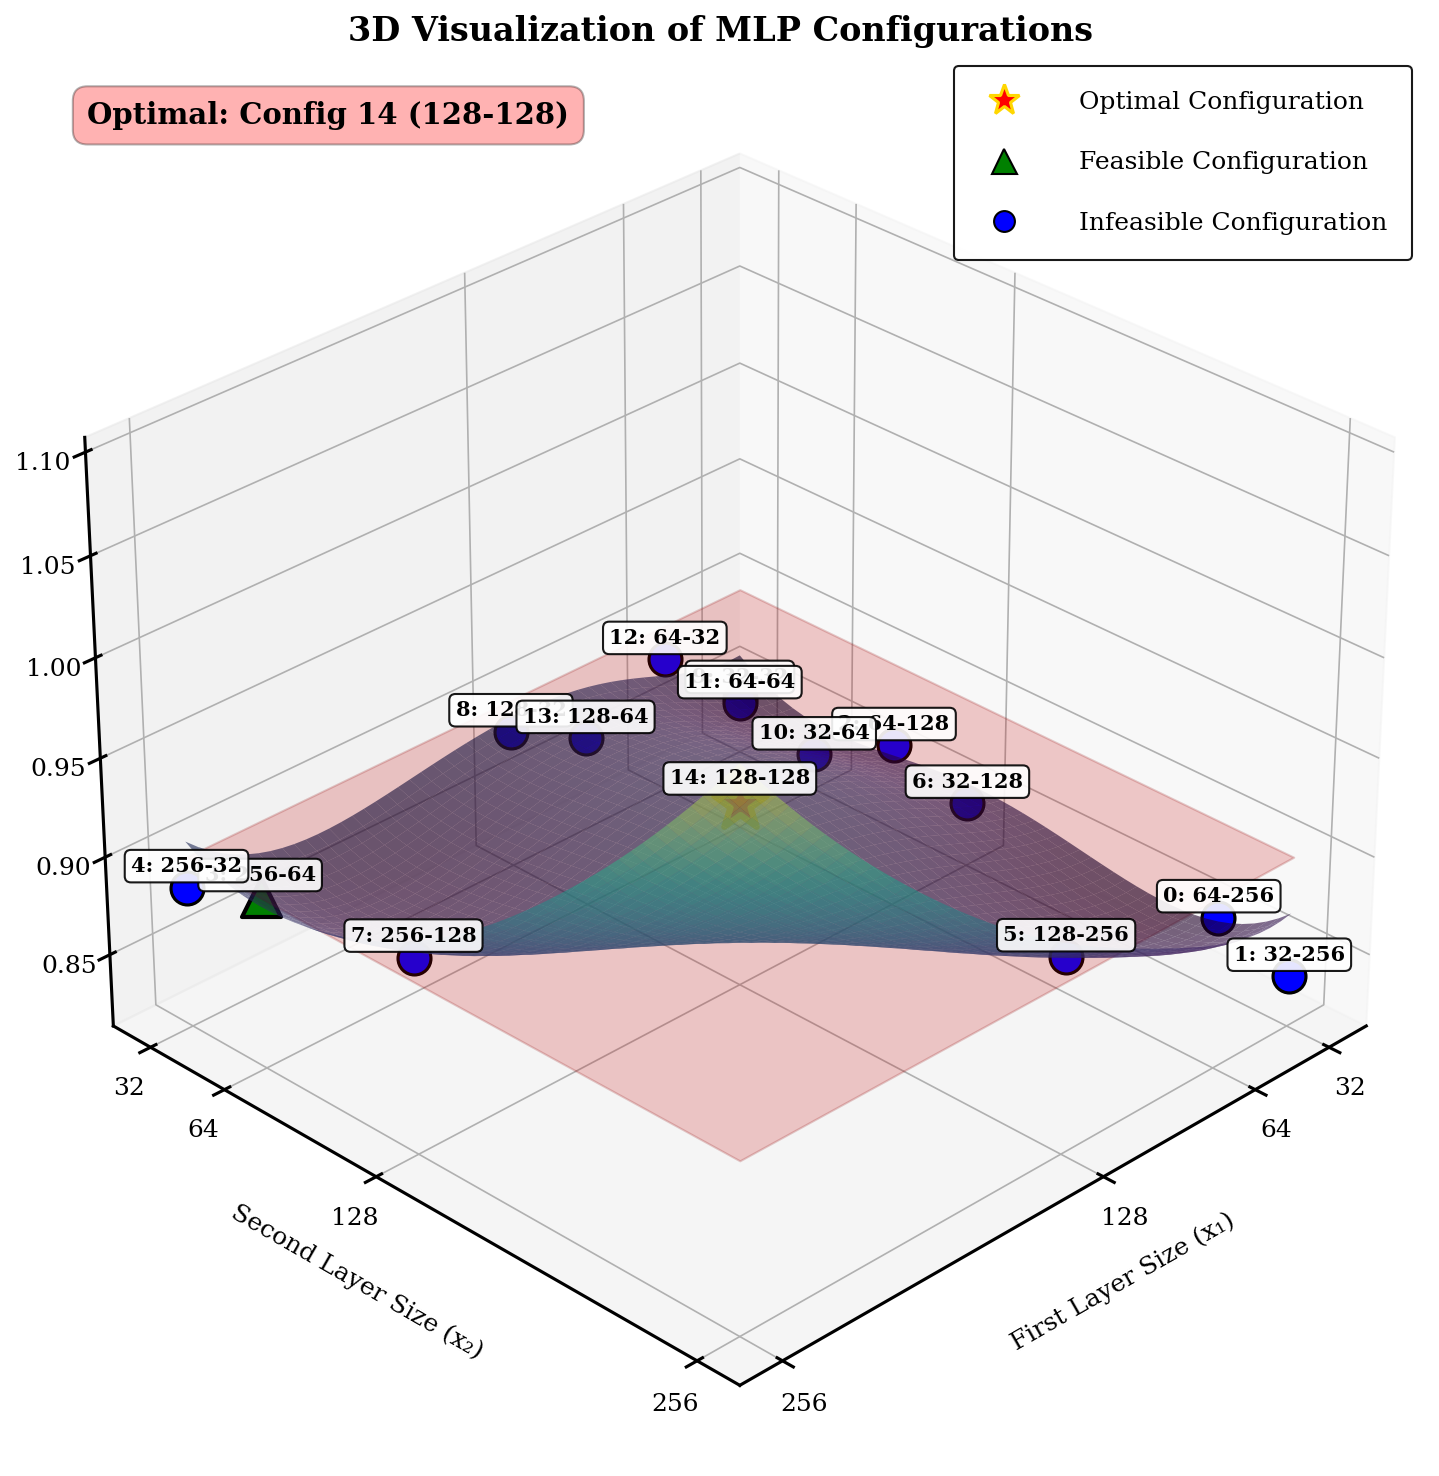

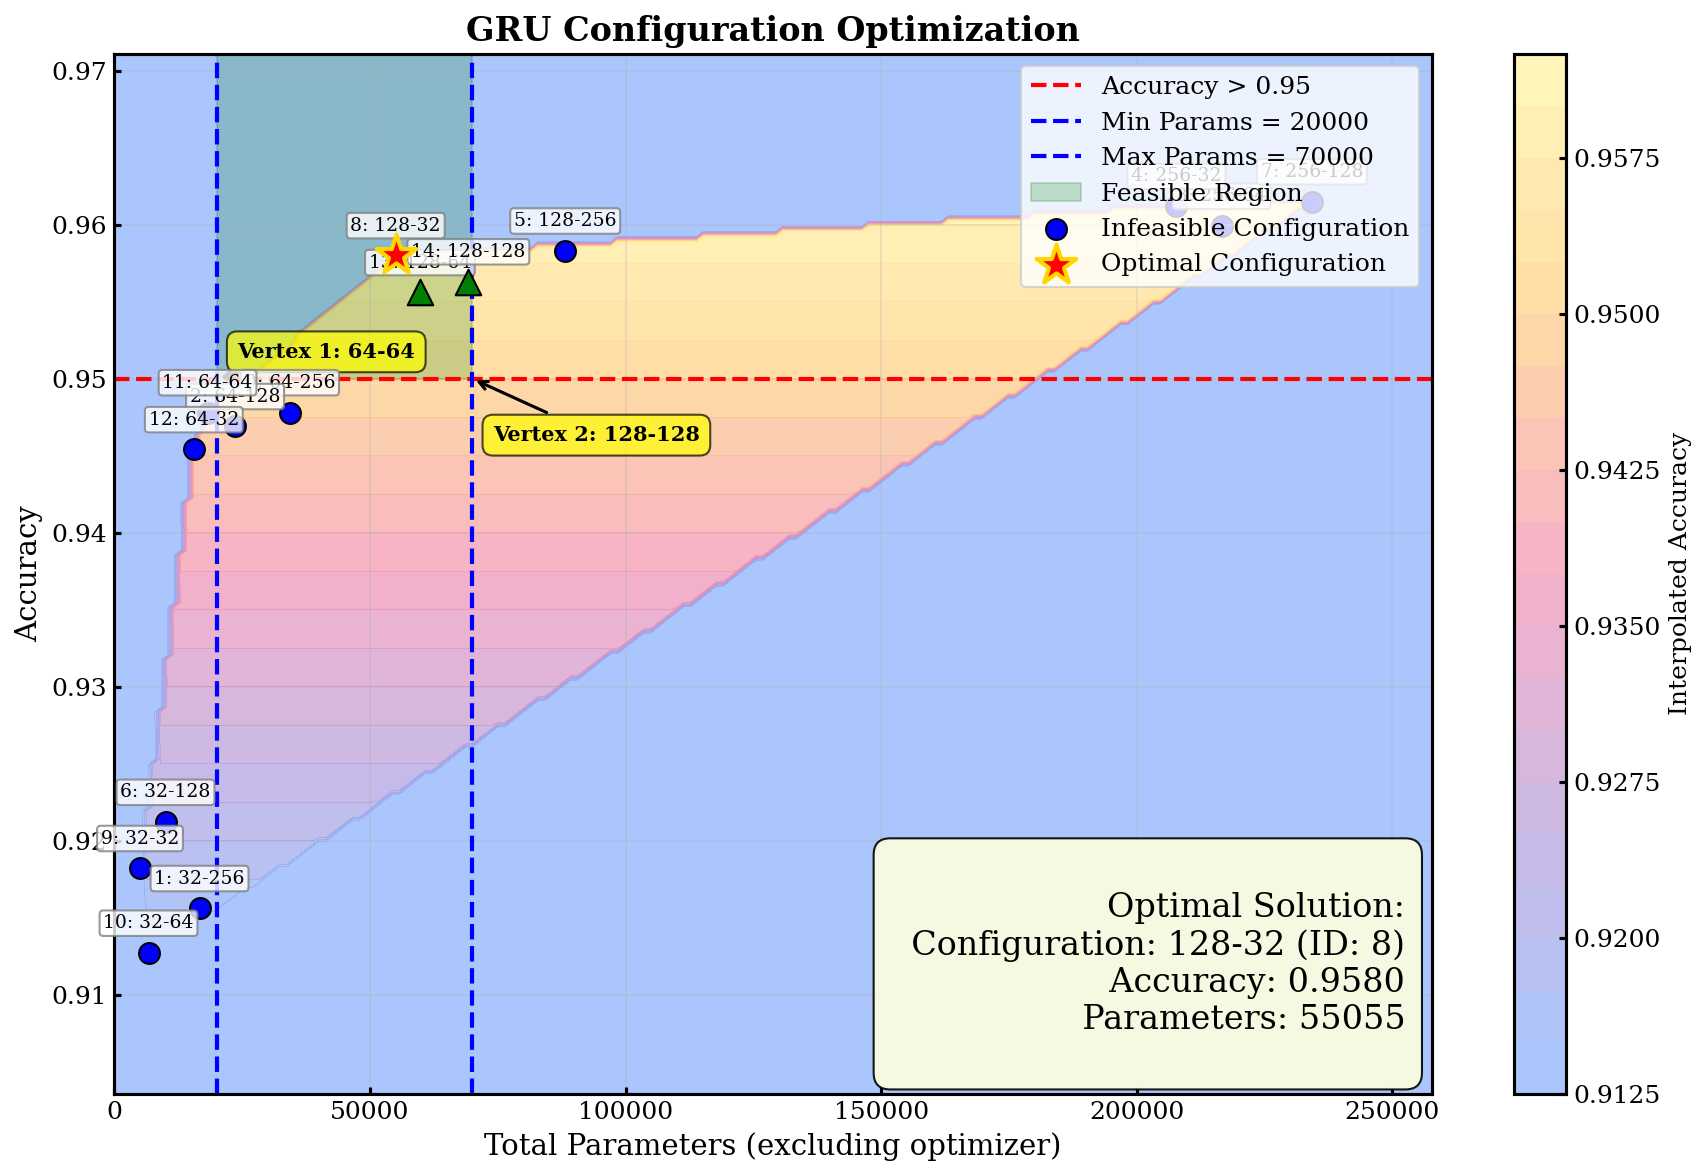

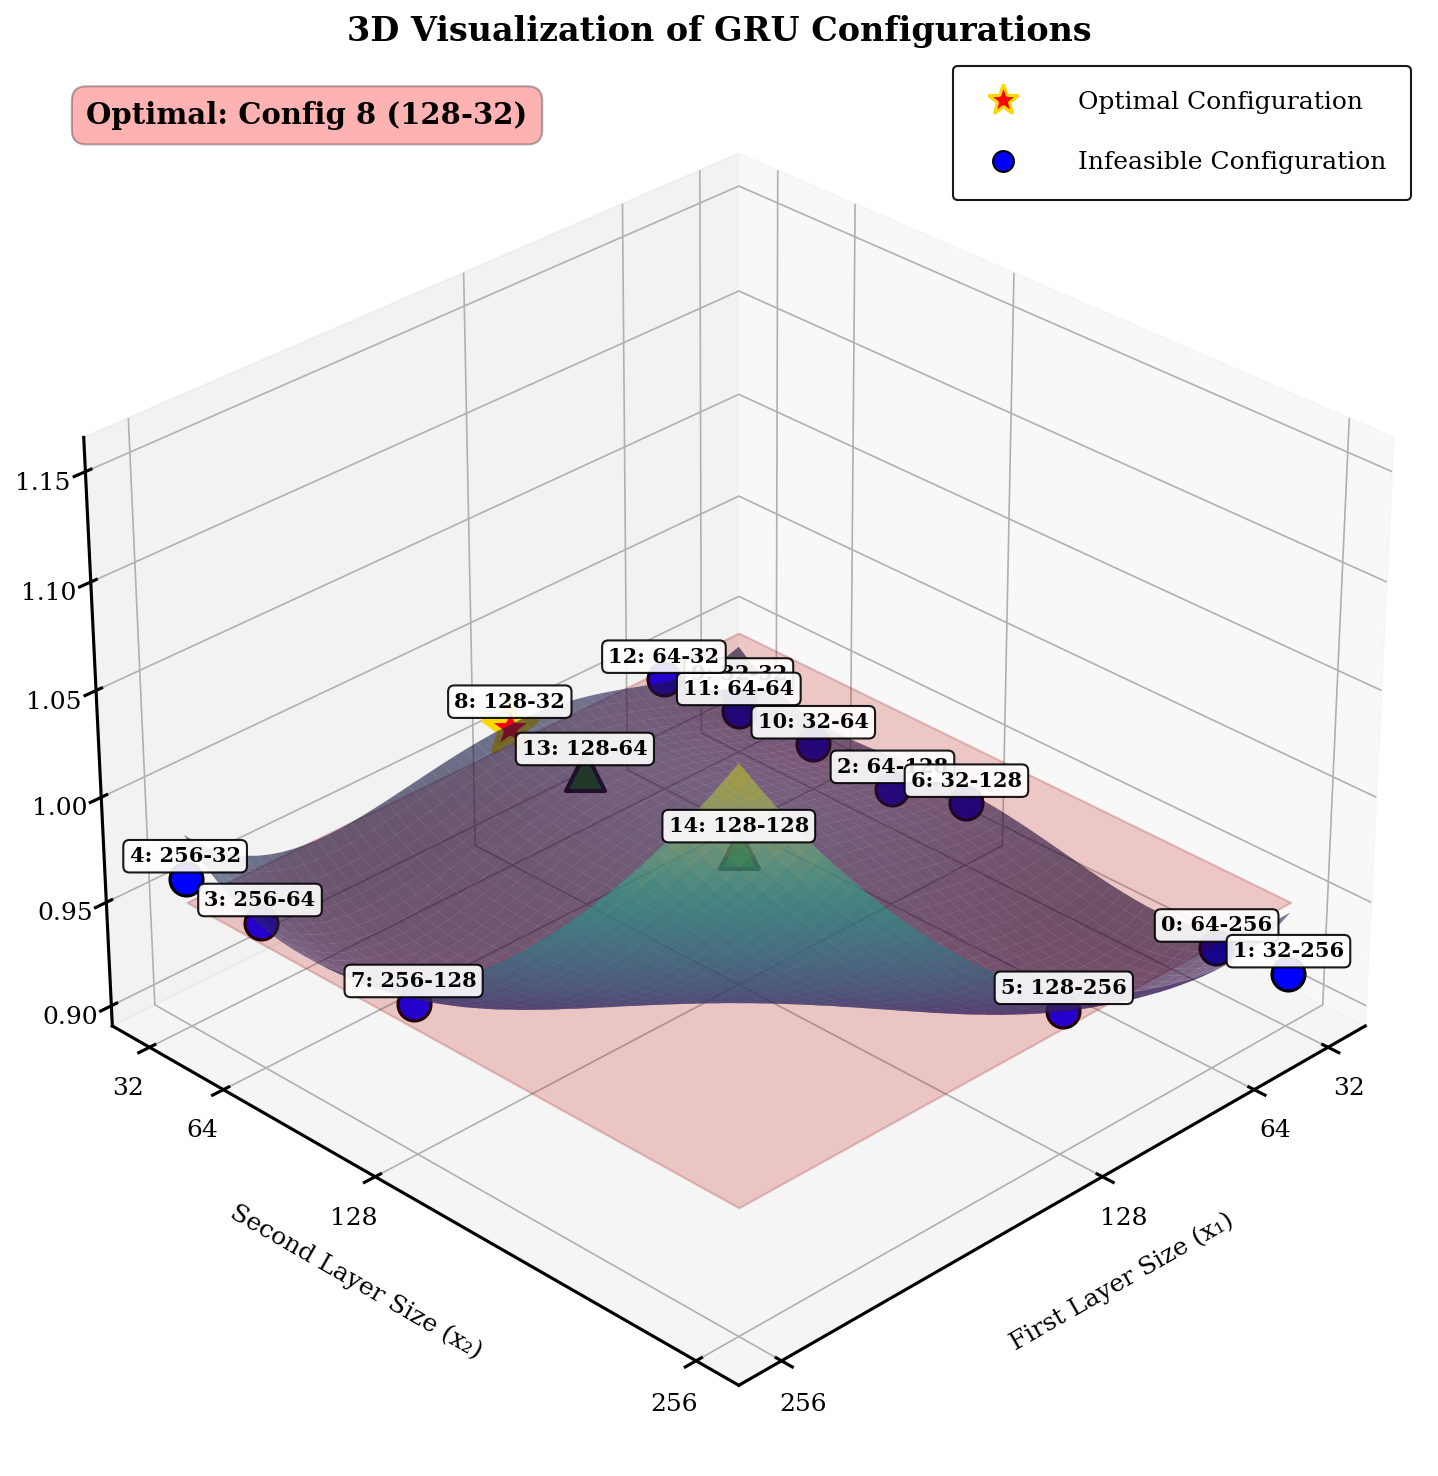

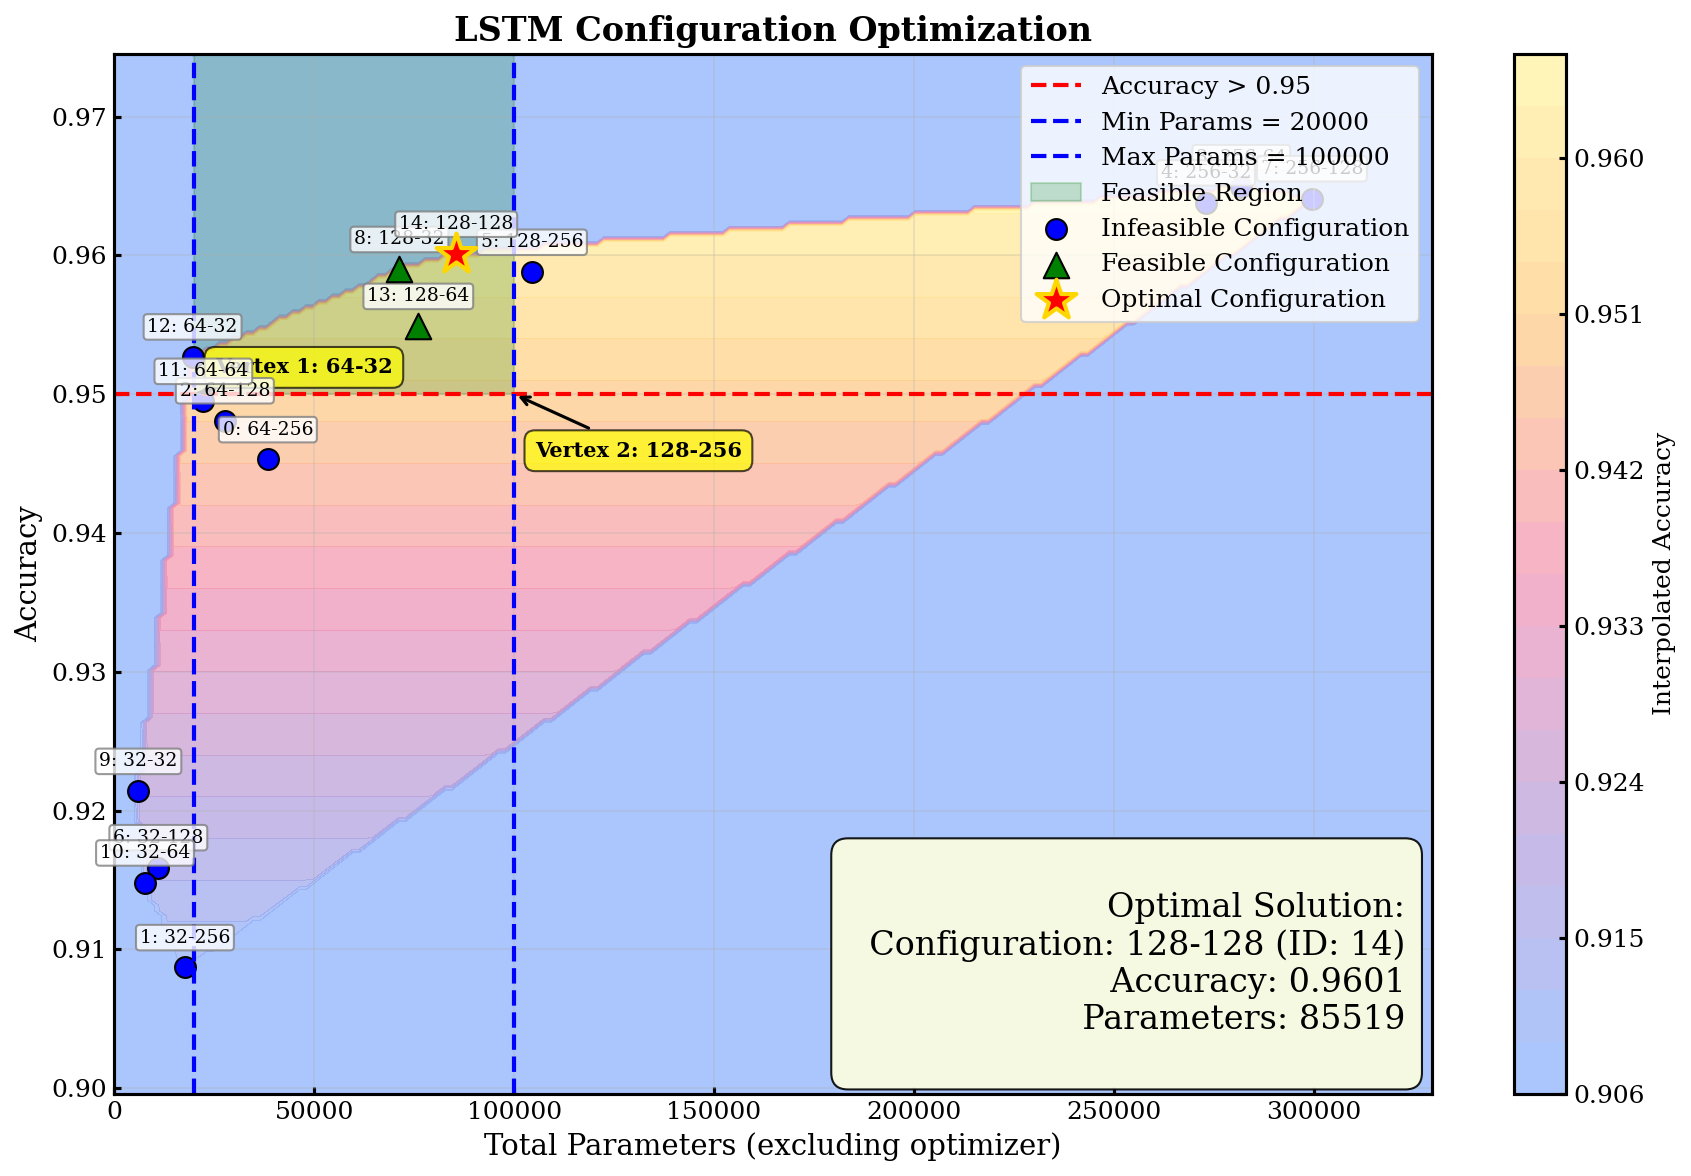

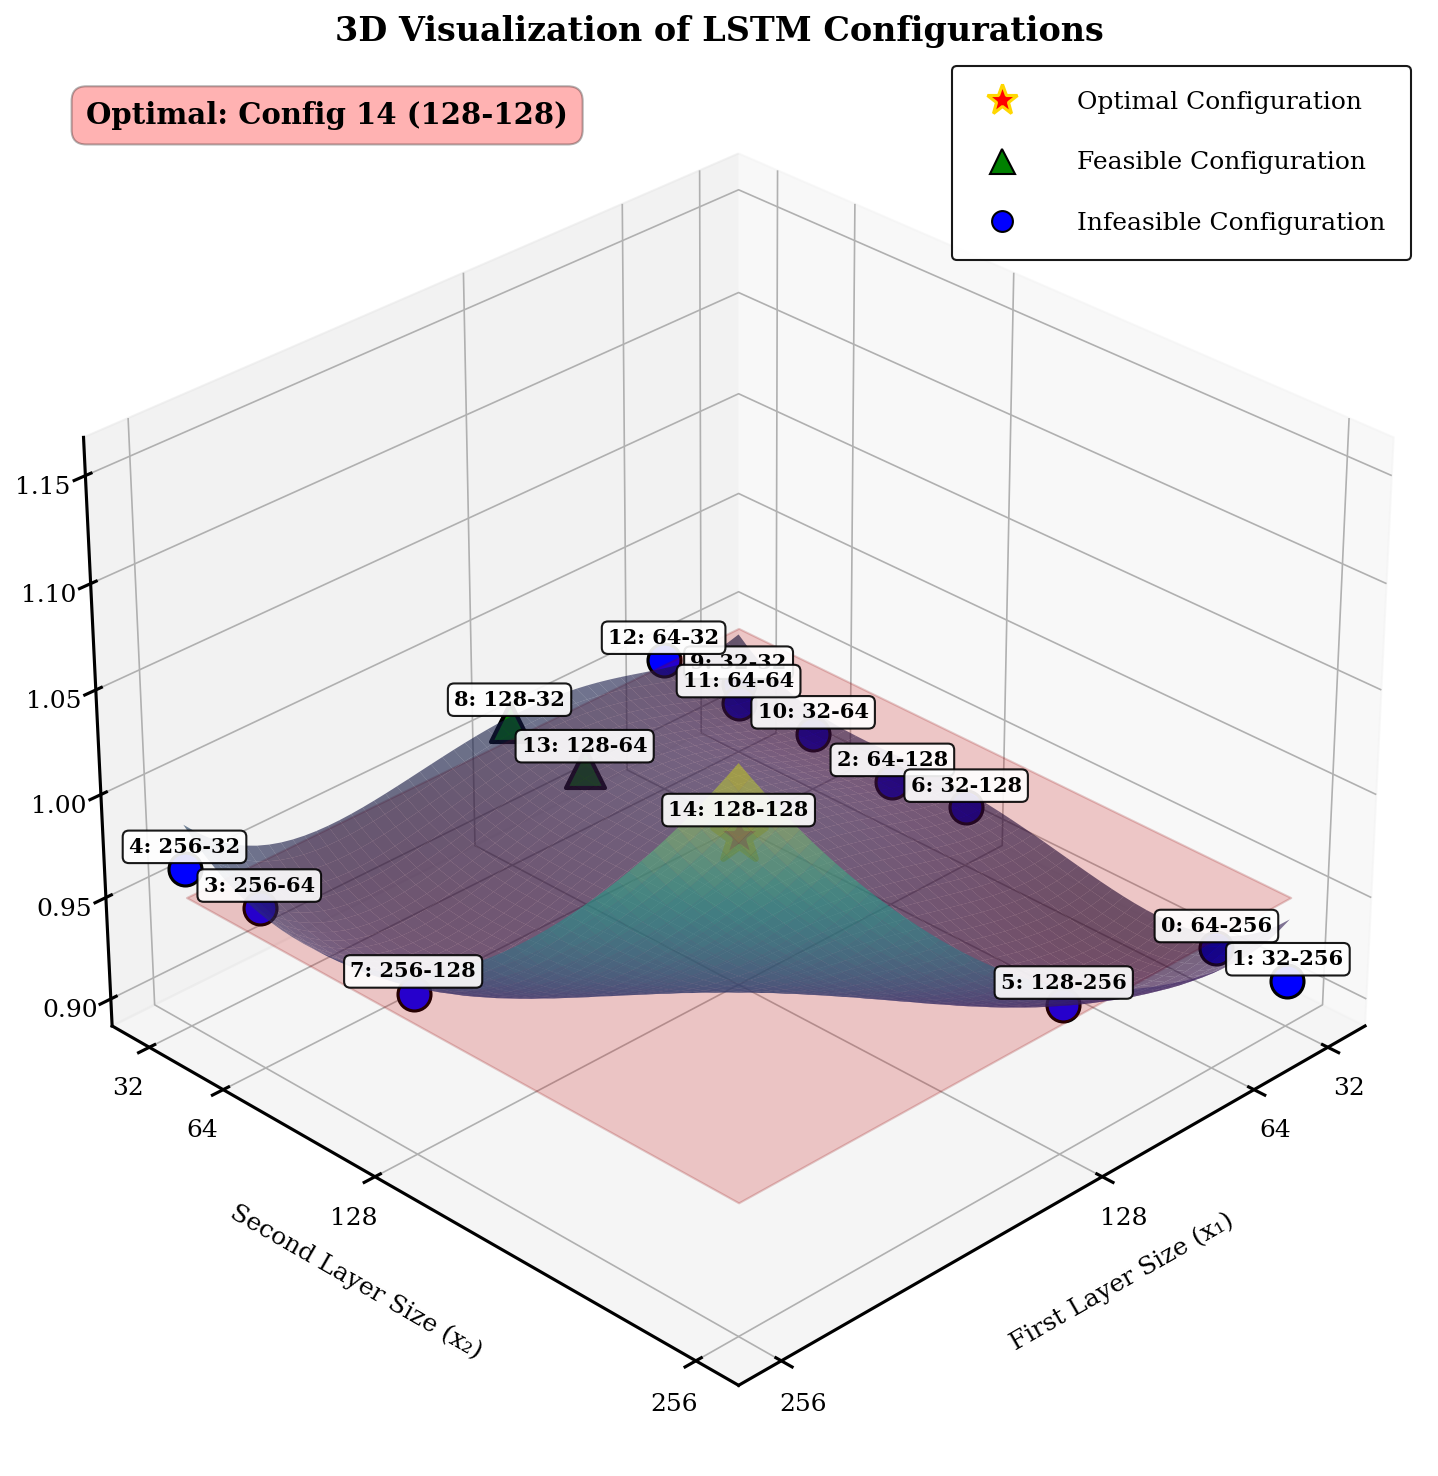

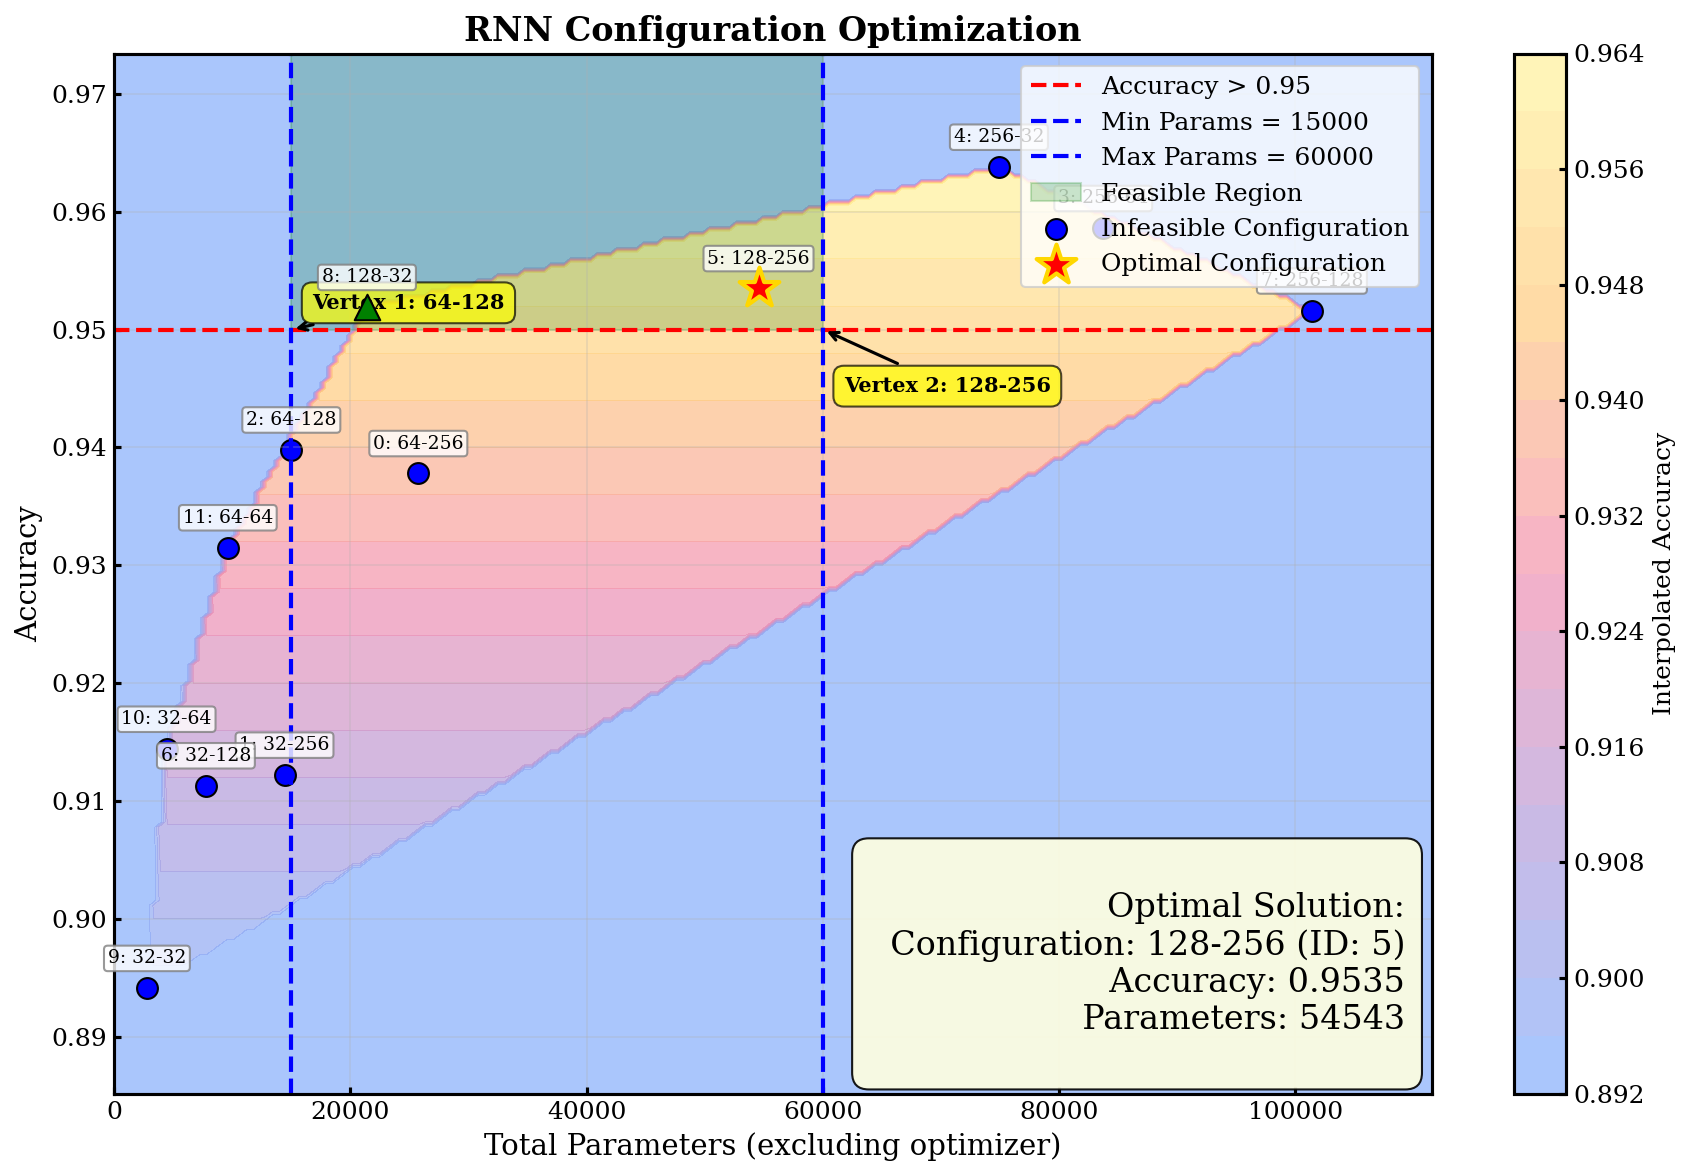

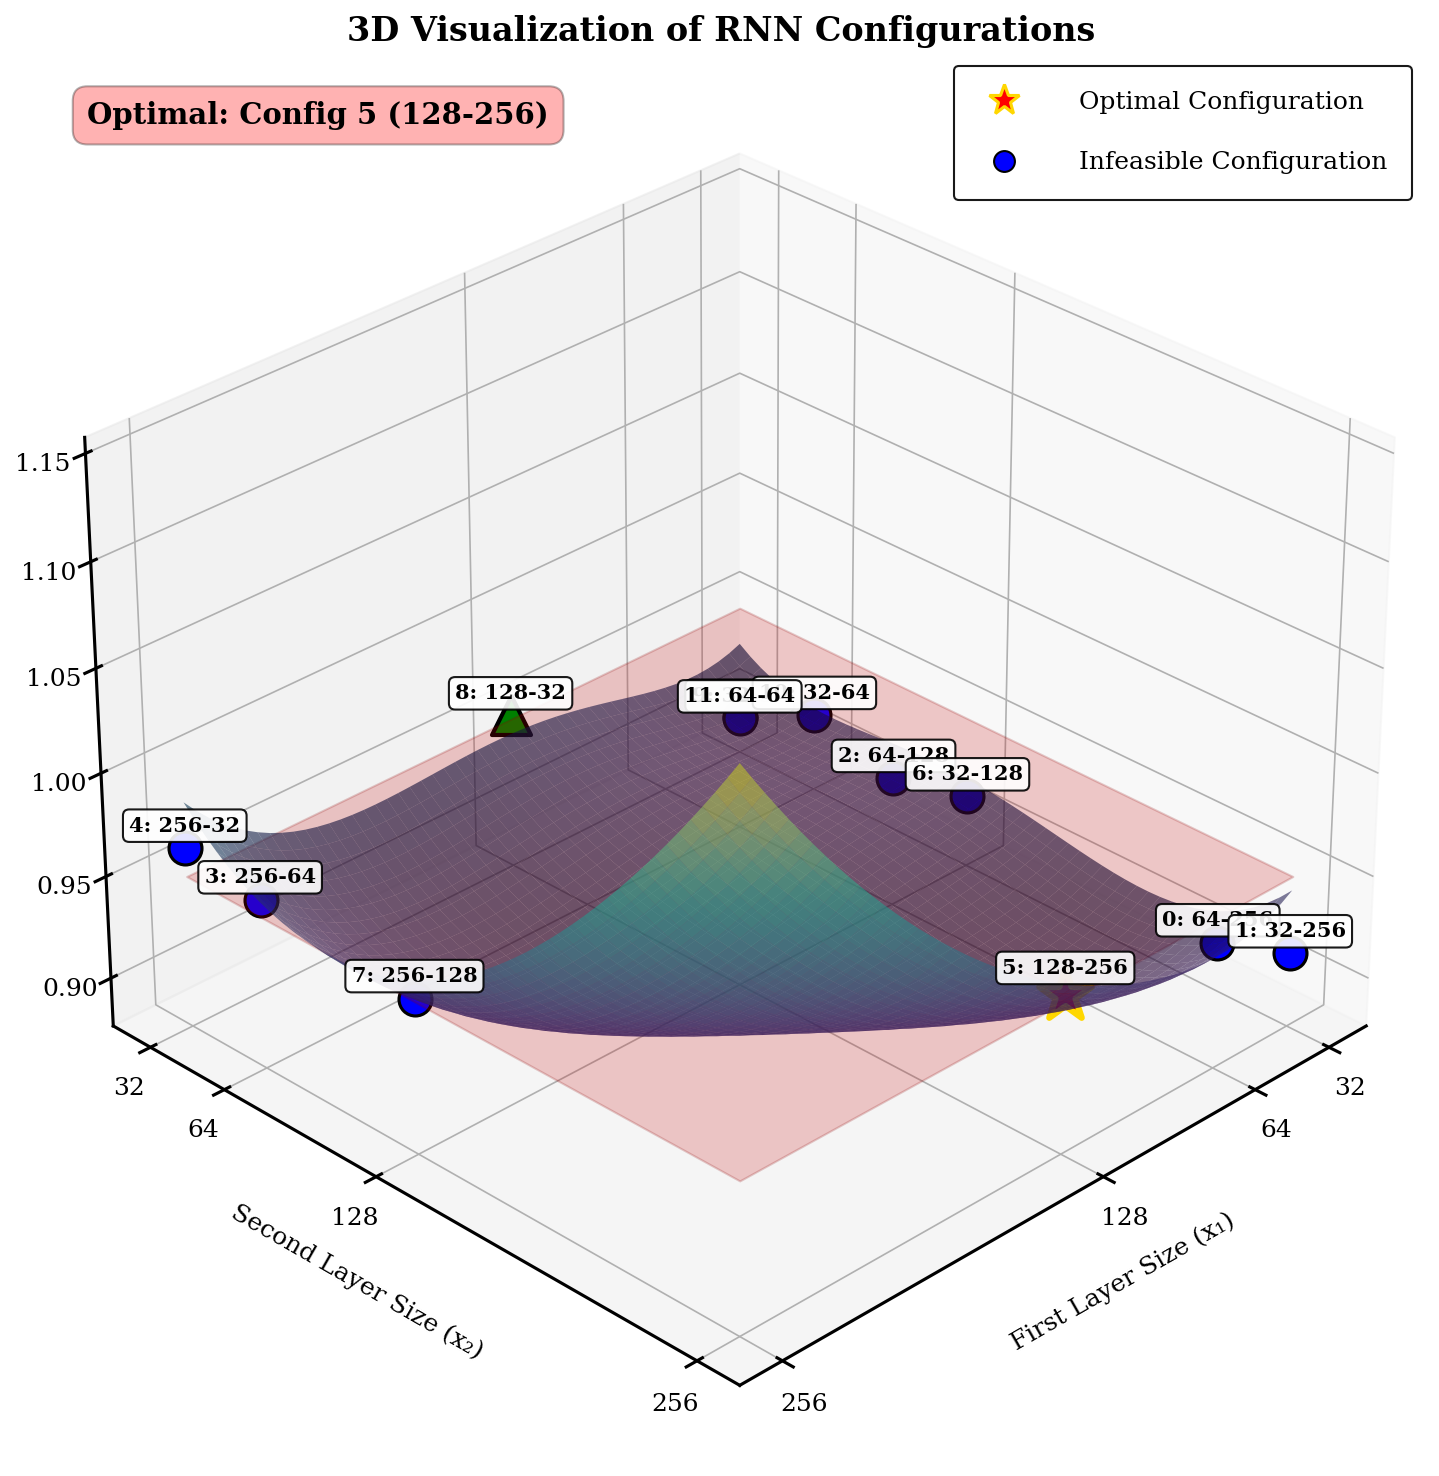

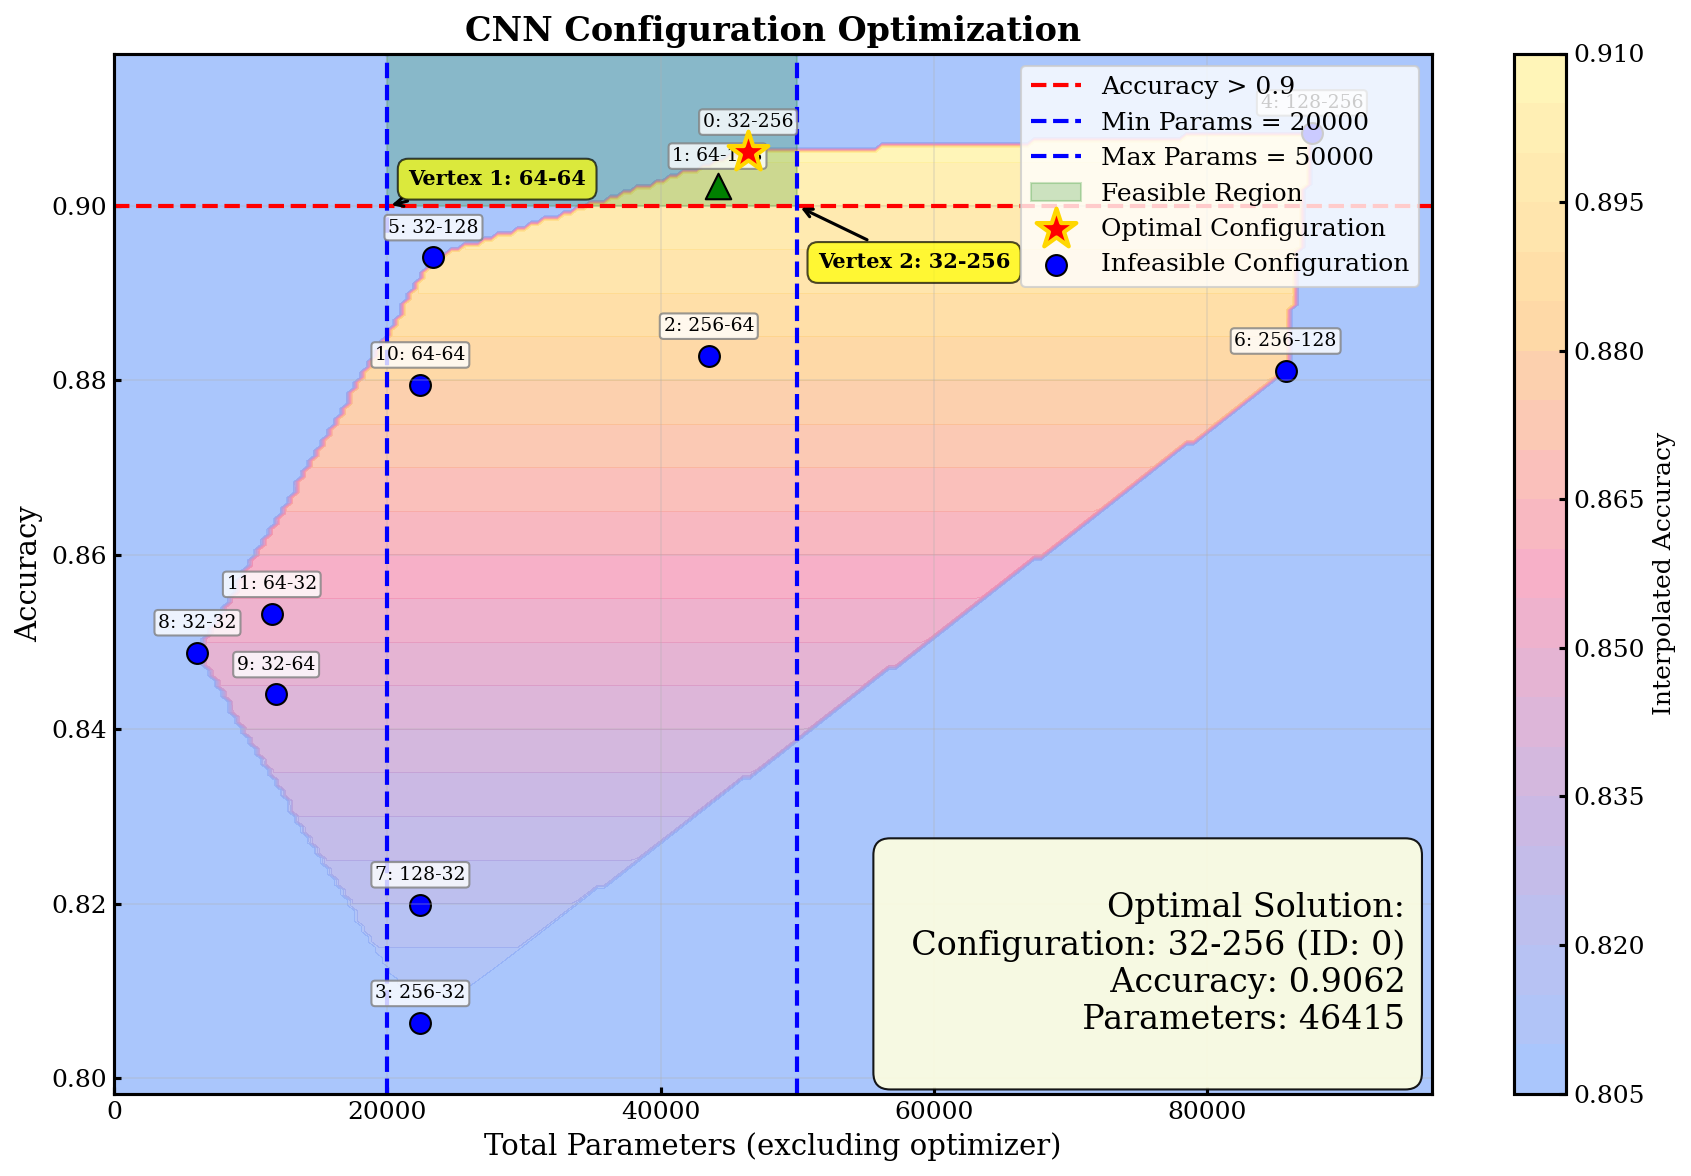

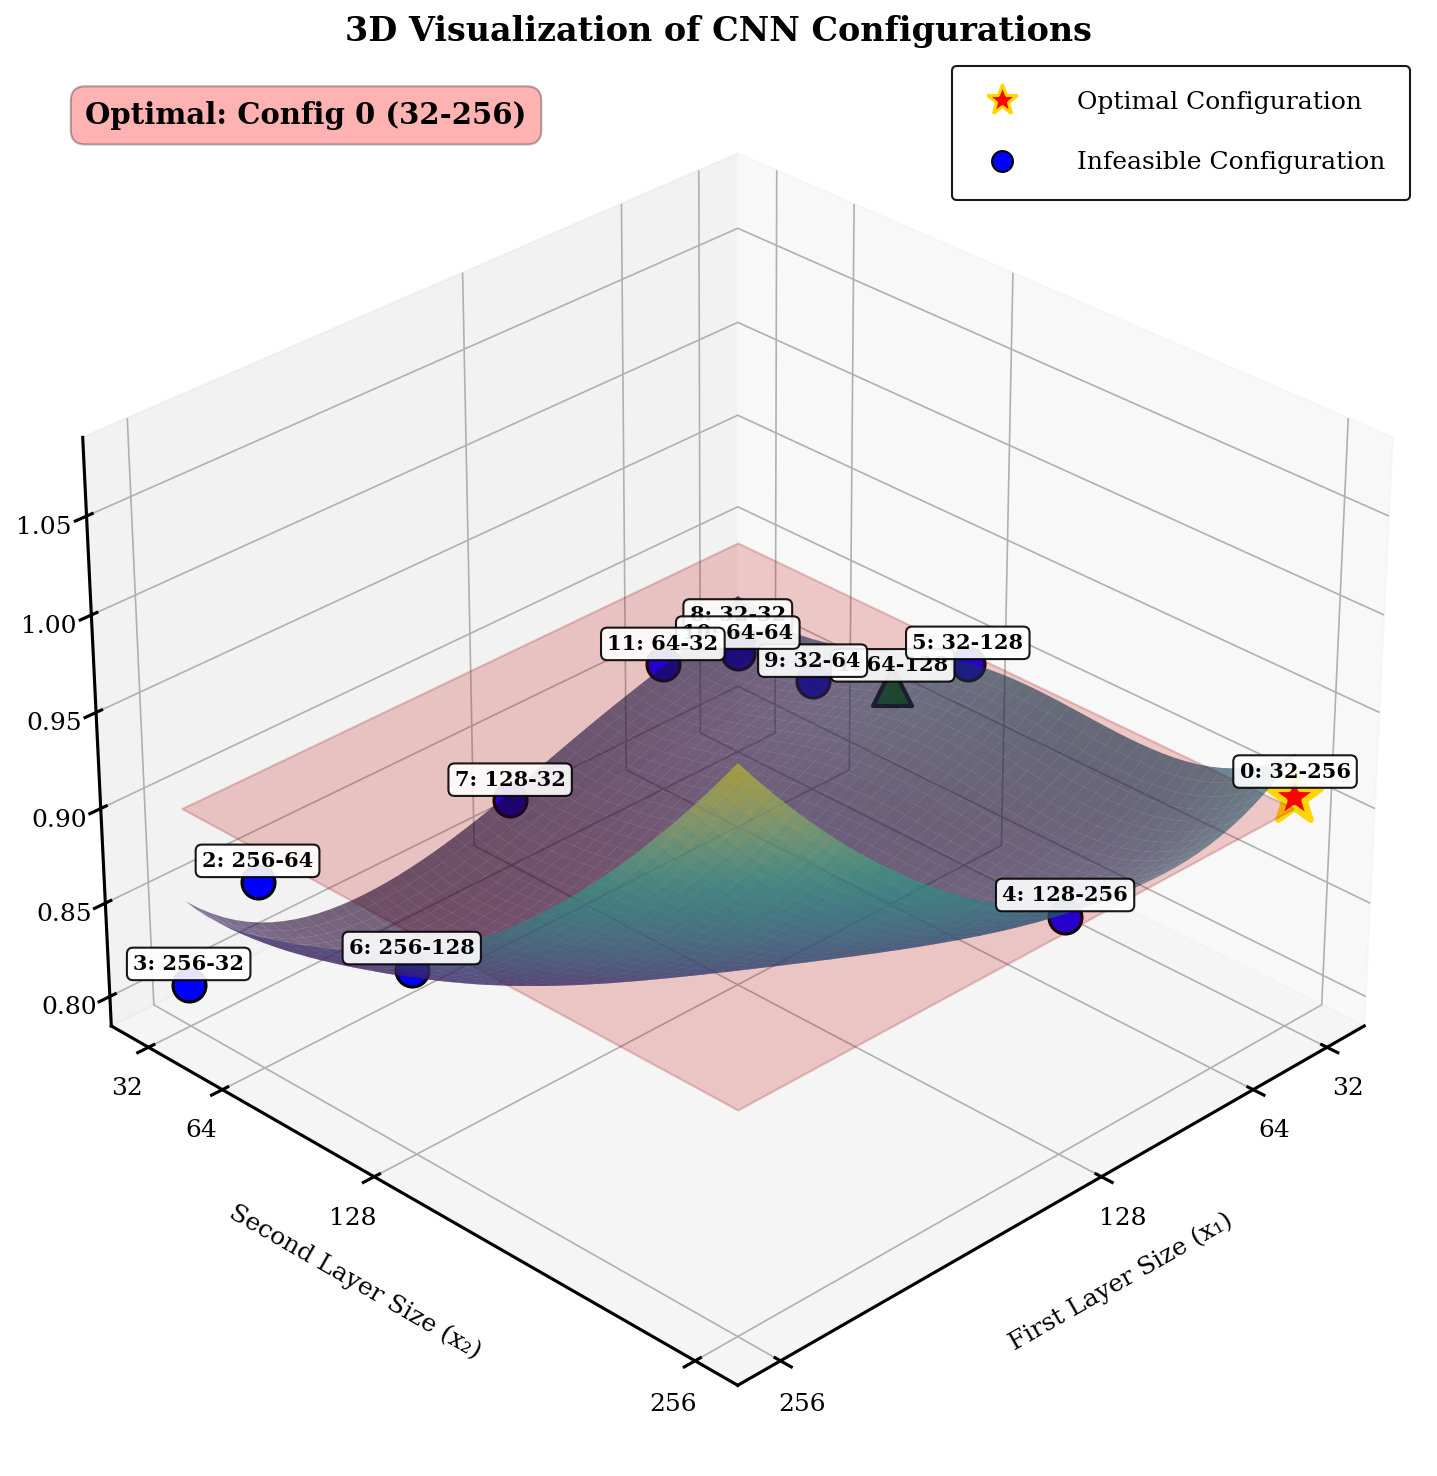

In [55]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
from scipy.interpolate import griddata, Rbf
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize, LightSource
from scipy.spatial import ConvexHull
import matplotlib.patheffects as PathEffects
from matplotlib import cm
from matplotlib.lines import Line2D

# Set the visual style for publication quality
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = 150

# Function to extract layer sizes from config string (assuming format like "64-128")
def extract_layer_sizes(df):
    df[['layer1', 'layer2']] = df['configuration'].str.split('-', expand=True).astype(int)
    return df

# Define constraints for each model
model_constraints = {
    'mlp': {'min_accuracy': 0.9, 'min_params': 15000, 'max_params': 25000, 'title': 'MLP'},
    'gru': {'min_accuracy': 0.95, 'min_params': 20000, 'max_params': 70000, 'title': 'GRU'},
    'lstm': {'min_accuracy': 0.95, 'min_params': 20000, 'max_params': 100000, 'title': 'LSTM'},
    'rnn': {'min_accuracy': 0.95, 'min_params': 15000, 'max_params': 60000, 'title': 'RNN'},
    'cnn': {'min_accuracy': 0.9, 'min_params': 20000, 'max_params': 50000, 'title': 'CNN'}
}

# Function to find optimal configuration
def find_optimal_config(df, min_accuracy, min_params, max_params):
    df['feasible'] = ((df['accuracy'] > min_accuracy) & 
                      (df['total_params_excluding_optimizer'] >= min_params) & 
                      (df['total_params_excluding_optimizer'] <= max_params))
    
    feasible_df = df[df['feasible']]
    if feasible_df.empty:
        return None
    
    optimal_idx = feasible_df['accuracy'].idxmax()
    return df.loc[optimal_idx]

# Function to create 2D constraint plot with optimal configuration
def create_constraint_plot(df, model_name, min_accuracy, min_params, max_params, optimal_config):
    fig = plt.figure(figsize=(12, 8))
    
    # Create a gradient background for accuracy
    x_mesh = np.linspace(0, df['total_params_excluding_optimizer'].max() * 1.1, 200)
    y_mesh = np.linspace(df['accuracy'].min() * 0.99, df['accuracy'].max() * 1.01, 200)
    X_mesh, Y_mesh = np.meshgrid(x_mesh, y_mesh)
    
    # Interpolate accuracy values
    points = df[['total_params_excluding_optimizer', 'accuracy']].values
    values = df['accuracy'].values
    Z_mesh = griddata(points, values, (X_mesh, Y_mesh), method='cubic', fill_value=df['accuracy'].min())
    
    # Create a custom colormap
    cmap = LinearSegmentedColormap.from_list('accuracy_cmap', 
                                            ['#82b1ff', '#b39ddb', '#f48fb1', '#ffcc80', '#fff59d'], 
                                            N=256)
    
    # Plot the interpolated accuracy background
    contour = plt.contourf(X_mesh, Y_mesh, Z_mesh, 20, cmap=cmap, alpha=0.7)
    plt.colorbar(contour, label='Interpolated Accuracy')
    
    # Draw constraint boundaries
    plt.axhline(y=min_accuracy, color='red', linestyle='--', linewidth=2, 
               label=f'Accuracy > {min_accuracy}')
    plt.axvline(x=min_params, color='blue', linestyle='--', linewidth=2, 
               label=f'Min Params = {min_params}')
    plt.axvline(x=max_params, color='blue', linestyle='--', linewidth=2, 
               label=f'Max Params = {max_params}')
    
    # Highlight the feasible region
    feasible_x = [min_params, max_params, max_params, min_params]
    feasible_y = [min_accuracy, min_accuracy, df['accuracy'].max() * 1.01, df['accuracy'].max() * 1.01]
    plt.fill(feasible_x, feasible_y, color='green', alpha=0.2, label='Feasible Region')
    
    # Define vertices of constraints
    vertices = [
        (min_params, min_accuracy),  # Bottom-left
        (max_params, min_accuracy),  # Bottom-right
    ]
    
    # Label the vertices with closest configurations
    vertex_labels = []
    for i, (x, y) in enumerate(vertices):
        # Find the closest configuration to this vertex
        df['dist_to_vertex'] = np.sqrt((df['total_params_excluding_optimizer'] - x)**2 + 
                                       (df['accuracy'] - y)**2)
        closest_idx = df['dist_to_vertex'].idxmin()
        closest_config = df.loc[closest_idx]
        
        # Add vertex label with better positioning
        label = plt.annotate(f"Vertex {i+1}: {closest_config['configuration']}", 
                    (x, y), xytext=(10, 10 if i == 0 else -30), 
                    textcoords='offset points', fontsize=10, fontweight='bold',
                    arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7))
        vertex_labels.append(label)
    
    # First plot all points without labels
    for i, row in df.iterrows():
        if row['feasible'] and i == optimal_config.name:
            # Optimal config - make it special
            plt.scatter(row['total_params_excluding_optimizer'], row['accuracy'], 
                       marker='*', s=400, color='red', edgecolor='gold', linewidth=2, zorder=10,
                       label='Optimal Configuration')
        elif row['feasible']:
            # Feasible configs
            plt.scatter(row['total_params_excluding_optimizer'], row['accuracy'],
                       marker='^', s=150, color='green', edgecolor='black', linewidth=1, zorder=5,
                       label='Feasible Configuration' if i == df[df['feasible']].index[0] else None)
        else:
            # Infeasible configs
            plt.scatter(row['total_params_excluding_optimizer'], row['accuracy'],
                       marker='o', s=100, color='blue', edgecolor='black', linewidth=1, zorder=1,
                       label='Infeasible Configuration' if i == df[~df['feasible']].index[0] else None)
    
    # Then add labels separately to ensure they match the points
    for i, row in df.iterrows():
        # Add config label directly on top of its point
        plt.annotate(f"{i}: {row['configuration']}", 
                    (row['total_params_excluding_optimizer'], row['accuracy']),
                    xytext=(0, 10), textcoords='offset points', fontsize=9,
                    ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8, ec='gray'))
    
    plt.title(f'{model_constraints[model_name]["title"]} Configuration Optimization', fontsize=16, fontweight='bold')
    plt.xlabel('Total Parameters (excluding optimizer)', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Create a new figure layout with more space for text boxes
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])
    
    # Add formulation text - moved up and made bigger
    formulation_text = f"""
Linear Programming Formulation:
Decision Variables:
  x₁ = size of first layer (x₁ ∈ {{32, 64, 128, 256}})
  x₂ = size of second layer (x₂ ∈ {{32, 64, 128, 256}})
Objective Function:
  Maximize f(x₁, x₂) = Accuracy(x₁, x₂)
Constraints:
  1. Accuracy > {min_accuracy}
  2. {min_params} ≤ Params(x₁, x₂) ≤ {max_params}
    """
    print(formulation_text)
    # Add optimal solution details - to the right of formulation text
    solution_text = f"""
Optimal Solution:
  Configuration: {optimal_config['configuration']} (ID: {optimal_config.name})
  Accuracy: {optimal_config['accuracy']:.4f}
  Parameters: {optimal_config['total_params_excluding_optimizer']}
    """
    plt.text(0.98, 0.02, solution_text, transform=plt.gca().transAxes, fontsize=16,
        ha='right', va='bottom', bbox=dict(facecolor='lightyellow', alpha=0.9, 
                                       boxstyle='round,pad=0.5', edgecolor='black'))

    # Then AFTER the tight_layout call, do the savefig
    plt.tight_layout()
    
    # Handle legend duplicates
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    plt.savefig(f'{model_name}_constraint_optimization.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{model_name}_constraint_optimization.pdf', format='pdf', bbox_inches='tight')
    return plt


# Function to create enhanced 3D visualization with smoother surfaces and better labels
def create_3d_config_plot(df, model_name, min_accuracy, optimal_config):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Get unique layer sizes
    unique_layer1 = sorted(df['layer1'].unique())
    unique_layer2 = sorted(df['layer2'].unique())
    
    # Create a more dense grid for smooth surface
    x_fine = np.linspace(min(unique_layer1), max(unique_layer1), 50)
    y_fine = np.linspace(min(unique_layer2), max(unique_layer2), 50)
    X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
    
    # Create a plane at the minimum accuracy
    x_plane = np.array([min(df['layer1']), max(df['layer1'])])
    y_plane = np.array([min(df['layer2']), max(df['layer2'])])
    X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
    Z_plane = np.ones(X_plane.shape) * min_accuracy
    
    # Plot the accuracy threshold plane with reduced opacity
    ax.plot_surface(X_plane, Y_plane, Z_plane, color='red', alpha=0.2, linewidth=1, 
                   edgecolor='darkred', zorder=5)
    
    # Create the surface with better colors
    try:
        # Try to create a smooth RBF interpolation
        rbf = Rbf(df['layer1'], df['layer2'], df['accuracy'], function='multiquadric', smooth=0.2)
        Z_fine = rbf(X_fine, Y_fine)
        
        # Create a light source for better shading
        ls = LightSource(azdeg=315, altdeg=45)
        
        # Use a more vibrant colormap
        cmap = cm.viridis.copy()
        cmap.set_under('white', alpha=0)
        
        # Enhance the surface with better lighting and colors
        rgb = ls.shade(Z_fine, cmap=cmap, vert_exag=2.5, blend_mode='soft')
        
        # Plot the smooth surface with lighting and moderate opacity
        surf = ax.plot_surface(X_fine, Y_fine, Z_fine, facecolors=rgb, linewidth=0, 
                              antialiased=True, alpha=0.6, zorder=10)  # Higher alpha for more vibrant colors
    except Exception as e:
        print(f"Surface generation error: {e}")
        print("Falling back to simpler surface...")
        
        # Fallback to simpler surface
        Z_mesh = np.zeros((len(unique_layer2), len(unique_layer1)))
        for i, l1 in enumerate(unique_layer1):
            for j, l2 in enumerate(unique_layer2):
                match = df[(df['layer1'] == l1) & (df['layer2'] == l2)]
                if not match.empty:
                    Z_mesh[j, i] = match['accuracy'].values[0]
                else:
                    Z_mesh[j, i] = np.nan
        
        # Use masked array for missing values
        Z_mesh_masked = np.ma.masked_invalid(Z_mesh)
        L1_mesh, L2_mesh = np.meshgrid(unique_layer1, unique_layer2)
        surf = ax.plot_surface(L1_mesh, L2_mesh, Z_mesh_masked, cmap='viridis', 
                              alpha=0.6, edgecolor='k', linewidth=0.5, zorder=10)
    
    # Plot a convex hull around the feasible points if there are enough
    feasible_df = df[df['feasible']]
    if len(feasible_df) >= 4:
        try:
            hull_points = feasible_df[['layer1', 'layer2', 'accuracy']].values
            hull = ConvexHull(hull_points)
            for simplex in hull.simplices:
                ax.plot_trisurf(hull_points[simplex, 0], hull_points[simplex, 1], 
                               hull_points[simplex, 2], color='green', alpha=0.1, zorder=15)
        except Exception as e:
            print(f"Convex hull error: {e}")
    
    # Plot all configurations with very high zorder to ensure they appear on top
    for i, row in df.iterrows():
        if row['feasible'] and i == optimal_config.name:
            # Optimal config - make it special and ensure it's on top
            ax.scatter(row['layer1'], row['layer2'], row['accuracy'],
                      marker='*', s=700, color='red', edgecolor='gold', linewidth=3, zorder=1000,
                      label='Optimal Configuration')
        elif row['feasible']:
            # Feasible configs
            ax.scatter(row['layer1'], row['layer2'], row['accuracy'],
                      marker='^', s=350, color='green', edgecolor='black', linewidth=2, zorder=999,
                      label='Feasible Configuration' if i == df[df['feasible']].index[0] else None)
        else:
            # Infeasible configs
            ax.scatter(row['layer1'], row['layer2'], row['accuracy'],
                      marker='o', s=250, color='blue', edgecolor='black', linewidth=1.5, zorder=998,
                      label='Infeasible Configuration' if i == df[~df['feasible']].index[0] else None)
    
    # Add labels in a separate loop to ensure they're on top, with much higher position
    for i, row in df.iterrows():
        # Significantly increase the height offset for better visibility
        height_offset = 0.01 if row['feasible'] and i == optimal_config.name else 0.008
        
        # Enhanced label with stronger background and border
        text = ax.text(row['layer1'], row['layer2'], row['accuracy'] + height_offset,
                      f"{i}: {row['configuration']}", fontsize=10, fontweight='bold', ha='center',
                      bbox=dict(facecolor='white', alpha=0.9, boxstyle='round,pad=0.3', 
                               edgecolor='black', linewidth=1),
                      zorder=1001)  # Higher zorder than points
    
    # Set labels and title
    ax.set_title(f'3D Visualization of {model_constraints[model_name]["title"]} Configurations', 
                fontsize=16, fontweight='bold')
    ax.set_xlabel('First Layer Size (x₁)', fontsize=12, labelpad=10)
    ax.set_ylabel('Second Layer Size (x₂)', fontsize=12, labelpad=10)
    ax.set_zlabel('Accuracy', fontsize=12, labelpad=10)
    
    # Set ticks to only relevant values
    ax.set_xticks(unique_layer1)
    ax.set_yticks(unique_layer2)
    
    # Set the view angle
    ax.view_init(elev=30, azim=45)
    
    # Add legend in a better position with customized size for markers
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    if by_label:  # Only create legend if we have labels
        # Create a custom legend with properly sized markers
        legend_elements = []
        if 'Optimal Configuration' in by_label:
            legend_elements.append(Line2D([0], [0], marker='*', color='w', markerfacecolor='red',
                                         markeredgecolor='gold', markersize=15, markeredgewidth=1.5,
                                         label='Optimal Configuration'))
        if 'Feasible Configuration' in by_label:
            legend_elements.append(Line2D([0], [0], marker='^', color='w', markerfacecolor='green',
                                         markeredgecolor='black', markersize=12, markeredgewidth=1.0,
                                         label='Feasible Configuration'))
        if 'Infeasible Configuration' in by_label:
            legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',
                                         markeredgecolor='black', markersize=10, markeredgewidth=1.0,
                                         label='Infeasible Configuration'))
        
        # Create legend with custom elements and bigger size
        ax.legend(handles=legend_elements, loc='upper right', fontsize=12, 
                 framealpha=0.9, edgecolor='black', borderpad=1.0,
                 handletextpad=2.0, labelspacing=1.5)
    
    # Add a bold, clear annotation for the optimal configuration
    ax.text2D(0.05, 0.95, f"Optimal: Config {optimal_config.name} ({optimal_config['configuration']})", 
             transform=ax.transAxes, fontsize=14, fontweight='bold',
             bbox=dict(facecolor='red', alpha=0.3, boxstyle='round', edgecolor='black', pad=0.5), 
             zorder=100)
        
    plt.tight_layout()
    plt.savefig(f'{model_name}_3d_configuration.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{model_name}_3d_configuration.pdf', format='pdf', bbox_inches='tight')
    return plt

# Function for comparative visualization across models - no longer used
def create_comparative_visualization(model_dfs, optimal_configs):
    """This function is no longer used as we're not creating comparative plots"""
    pass

# Main analysis function that runs on each model's dataframe
def analyze_model(df, model_name):
    # Extract constraints for this model
    constraints = model_constraints[model_name]
    min_accuracy = constraints['min_accuracy']
    min_params = constraints['min_params']
    max_params = constraints['max_params']
    
    # Extract layer sizes
    df = extract_layer_sizes(df)
    
    # Find optimal configuration
    optimal_config = find_optimal_config(df, min_accuracy, min_params, max_params)
    
    if optimal_config is None:
        print(f"No feasible configurations found for {constraints['title']}")
        return
    
    print(f"\n{'='*50}")
    print(f"Analysis for {constraints['title']} Model")
    print(f"{'='*50}")
    print(f"Optimal configuration: {optimal_config['configuration']} (ID: {optimal_config.name})")
    print(f"Accuracy: {optimal_config['accuracy']:.4f}")
    print(f"Parameters: {optimal_config['total_params_excluding_optimizer']}")
    
    # Create 2D constraint visualization
    create_constraint_plot(df, model_name, min_accuracy, min_params, max_params, optimal_config)
    
    # Create 3D visualization
    create_3d_config_plot(df, model_name, min_accuracy, optimal_config)
    
    return optimal_config

# Run analysis on each model
def run_multi_model_analysis(model_dfs):
    for model_name, df in model_dfs.items():
        optimal_config = analyze_model(df, model_name)
        if optimal_config is None:
            print(f"No feasible configurations found for {model_name}")

# Create a dictionary of all model dataframes
model_dfs = {
    'mlp': mlp_df,
    'gru': gru_df,
    'lstm': lstm_df,
    'rnn': rnn_df,
    'cnn': cnn_df
}

# Run the analysis
try:
    run_multi_model_analysis(model_dfs)
except Exception as e:
    print(f"Error during analysis: {e}")
    import traceback
    traceback.print_exc()

In [15]:
# import matplotlib.pyplot as plt

# # Create figure
# plt.figure(figsize=(8, 6))

# # Plot lines with markers using 'results' DataFrame values
# plt.plot(results["Model"], results["Accuracy"], marker='o', linestyle='-', linewidth=2, markersize=8, label="Accuracy", color="red")
# plt.plot(results["Model"], results["Precision"], marker='s', linestyle='--', linewidth=2, markersize=8, label="Precision", color="blue")
# plt.plot(results["Model"], results["Recall"], marker='D', linestyle='-.', linewidth=2, markersize=8, label="Recall", color="green")

# # Add labels and title
# plt.xlabel("Models", fontsize=12, fontweight="bold")
# plt.ylabel("Performance", fontsize=12, fontweight="bold")
# plt.title("Model Performance Comparison", fontsize=14, fontweight="bold")

# # Set grid and legend
# plt.xticks(fontsize=11, fontweight="bold")
# plt.yticks(fontsize=11, fontweight="bold")
# plt.grid(True, linestyle="--", alpha=0.6)
# plt.legend(fontsize=12)

# # Show plot
# plt.show()
